#### Contexte du projet

*Description rapide des utilisateurs, de la problématique, de l'état de l'art et des besoins.*

Dans [son dernier rapport (2023)](https://www.ipcc.ch/report/sixth-assessment-report-cycle/), le Giec estime à 1,1°C l’augmentation de la température moyenne mondiale depuis la fin du XIXe siècle, qu’il attribue largement aux émissions de gaz à effet de serre générées par les activités humaines. Il formule également, à partir de différents scénarios d’émissions, des projections qui prévoient une élévation de température de +1,4°C (scénario le plus optimiste) à +4,4°C (scénario le plus pessimiste) d’ici 2100.

Les analyses du Giec sont établies à un niveau mondial, et pour de grandes régions comme l’Europe ou le bassin méditerranéen. **Des études climatiques sur des échelles plus réduites sont encore rares**.

**La problématique**

Ce projet vous propose d’**analyser le climat passé et de faire des projections sur le climat futur à l’échelle de la France, d’une région ou d’une commune (au choix)**.

# Exemple : évolution des températures moyennes mensuelles

In [1]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import kaleido

In [2]:
# on récupère les URLs des ressources de https://defis.data.gouv.fr/datasets/65e040c50a5c6872ebebc711
resources = requests.get(
    'https://www.data.gouv.fr/api/1/datasets/65e040c50a5c6872ebebc711/',
    headers={'X-fields': 'resources{url,type}'}
).json()['resources']
resources = [r for r in resources if r['type'] == 'main']
resources

[{'type': 'main',
  'url': 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/REF_CC/SIM_MENS/MENS_SIM2_1958-1959.csv.gz'},
 {'type': 'main',
  'url': 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/REF_CC/SIM_MENS/MENS_SIM2_1960-1969.csv.gz'},
 {'type': 'main',
  'url': 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/REF_CC/SIM_MENS/MENS_SIM2_1970-1979.csv.gz'},
 {'type': 'main',
  'url': 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/REF_CC/SIM_MENS/MENS_SIM2_1980-1989.csv.gz'},
 {'type': 'main',
  'url': 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/REF_CC/SIM_MENS/MENS_SIM2_1990-1999.csv.gz'},
 {'type': 'main',
  'url': 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/REF_CC/SIM_MENS/MENS_SIM2_2000-2009.csv.gz'},
 {'type': 'main',
  'url': 'https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/REF_CC/SIM_MENS/MENS_SIM2_2010-2019.csv.gz'},
 {'type': 'main',
  'url': 'https://objec

In [3]:
# import des données qui nous intéressent : coordonnées, mois de relevé, température moyenne mensuelle
dfs = []
for r in resources:
    tmp = pd.read_csv(
        r['url'],
        compression='gzip',
        sep=";",
        usecols=['LAMBX', 'LAMBY', 'DATE', 'T_MENS'],
        dtype={
            'LAMBX': int,
            'LAMBY': int,
            'DATE': str,
            'T_MENS': float,
        },
    )
    # on ne garde qu'une station
    dfs.append(
        tmp.loc[(tmp['LAMBX'] == 600) & (tmp['LAMBY'] == 24010)]
    )
df = pd.concat(dfs, ignore_index=True)
df

,LAMBX,LAMBY,DATE,T_MENS
0,600,24010,195808,16.2
1,600,24010,195809,16.5
2,600,24010,195810,12.4
3,600,24010,195811,9.5
4,600,24010,195812,8.0
...,...,...,...,...
784,600,24010,202312,10.7
785,600,24010,202401,7.6
786,600,24010,202402,10.7
787,600,24010,202403,9.8


In [4]:
df['annee'] = df['DATE'].str.slice(0, 4).astype(int)
df['mois'] = df['DATE'].str.slice(4, 6).astype(int)

# on ne garde qu'une année sur 5 pour plus de clarté dans le graphe
df_filtered = df.loc[df['annee'].apply(lambda y: y % 5 == 0)]

# on construit une échelle de couleur pour les années
colors = np.array([(255, 0, 0), (0, 0, 255)])
years = sorted(df_filtered['annee'].unique())
color_map = {y: f"rgb{tuple([round(k) for k in idx/len(years)*colors[0] + (len(years)-idx)/len(years)*colors[1]])}" for idx, y in enumerate(years)}
df

,LAMBX,LAMBY,DATE,T_MENS,annee,mois
0,600,24010,195808,16.2,1958,8
1,600,24010,195809,16.5,1958,9
2,600,24010,195810,12.4,1958,10
3,600,24010,195811,9.5,1958,11
4,600,24010,195812,8.0,1958,12
...,...,...,...,...,...,...
784,600,24010,202312,10.7,2023,12
785,600,24010,202401,7.6,2024,1
786,600,24010,202402,10.7,2024,2
787,600,24010,202403,9.8,2024,3


In [5]:
color_map

{1960: 'rgb(0, 0, 255)',
 1965: 'rgb(20, 0, 235)',
 1970: 'rgb(39, 0, 216)',
 1975: 'rgb(59, 0, 196)',
 1980: 'rgb(78, 0, 177)',
 1985: 'rgb(98, 0, 157)',
 1990: 'rgb(118, 0, 137)',
 1995: 'rgb(137, 0, 118)',
 2000: 'rgb(157, 0, 98)',
 2005: 'rgb(177, 0, 78)',
 2010: 'rgb(196, 0, 59)',
 2015: 'rgb(216, 0, 39)',
 2020: 'rgb(235, 0, 20)'}

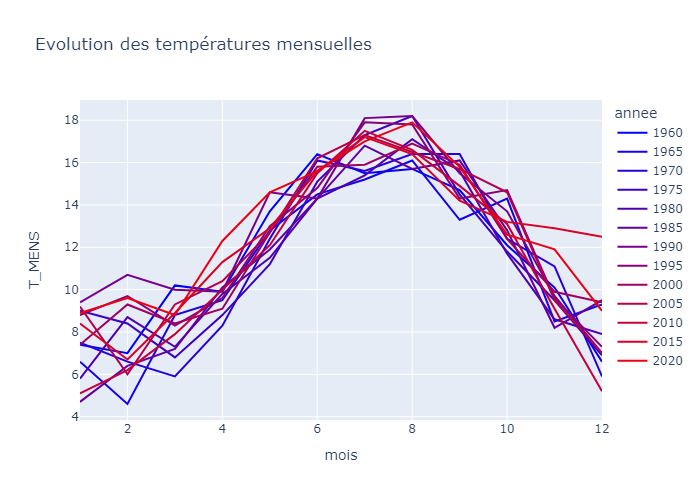

In [6]:
fig = px.line(
    df_filtered,
    x='mois',
    y='T_MENS',
    color='annee',
    title="Evolution des températures mensuelles",
    color_discrete_map=color_map,
)
# le paramètre renderer permet de garder l'image après fermeture du notebook mais il n'est plus interactible
fig.show(renderer='png')